In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
stock = pd.read_csv('C:/Users/Connor/Cs5804/mini-project-stock-ML/SPY_Trading_Project/data/raw/SPY.csv')

In [47]:
(stock.describe())

,Open,High,Low,Close,Adj Close,Volume
count,7786.000000,7786.000000,7786.000000,7786.000000,7786.000000,7.786000e+03
mean,170.450003,171.472339,169.326798,170.458874,141.620249,8.447759e+07
std,106.640696,107.212931,106.034684,106.668401,112.089264,9.233423e+07
min,43.343750,43.531250,42.812500,43.406250,24.464319,5.200000e+03
25%,105.280623,106.247498,104.450625,105.285000,70.398636,1.002330e+07
50%,132.178749,132.987190,131.160004,132.061249,93.180195,6.315320e+07
75%,210.257496,211.015003,209.307499,210.340000,180.639774,1.159852e+08
max,479.220001,479.980011,476.260010,477.709991,475.213501,8.710263e+08


In [48]:
stock['Date'] = pd.to_datetime(stock['Date'])
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(stock, columns=['Date', 'Adj Close'])

df.head()

,Date,Adj Close
0,1993-01-29,24.763727
1,1993-02-01,24.939861
2,1993-02-02,24.992720
3,1993-02-03,25.256903
4,1993-02-04,25.362587


In [49]:
df.isna().values.any()

False

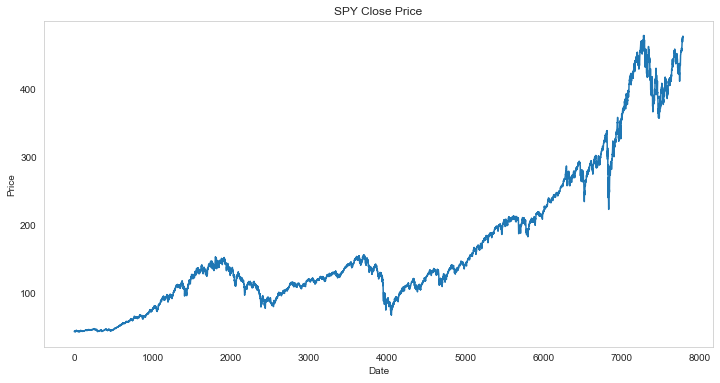

In [50]:
stock['Close'].plot(figsize=(12,6))
plt.title('SPY Close Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(which="major", linestyle='-.', linewidth=0.5)
plt.show()

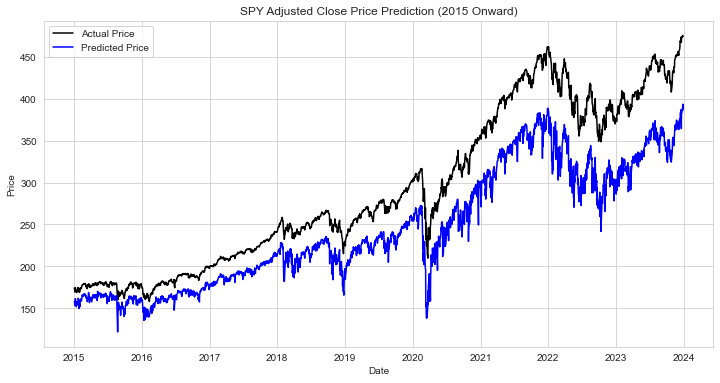

In [51]:


# Filter the data again and check the shapes
train_data = stock[stock['Date'] < '2015-01-01']
test_data = stock[stock['Date'] >= '2015-01-01']

# Define the features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'Close']
X_train = train_data[features]
y_train = train_data['Adj Close']
X_test = test_data[features]
y_test = test_data['Adj Close']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the actual vs predicted prices for the test data (2015 onward)
plt.figure(figsize=(12,6))
plt.plot(test_data['Date'], y_test, color='black', label='Actual Price')
plt.plot(test_data['Date'], y_pred, color='blue', label='Predicted Price')
plt.title('SPY Adjusted Close Price Prediction (2015 Onward)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 47.07801376036069
Mean Squared Error: 2854.7138058290393
Root Mean Squared Error: 53.429521856638765
R-squared: 0.6730131549612222


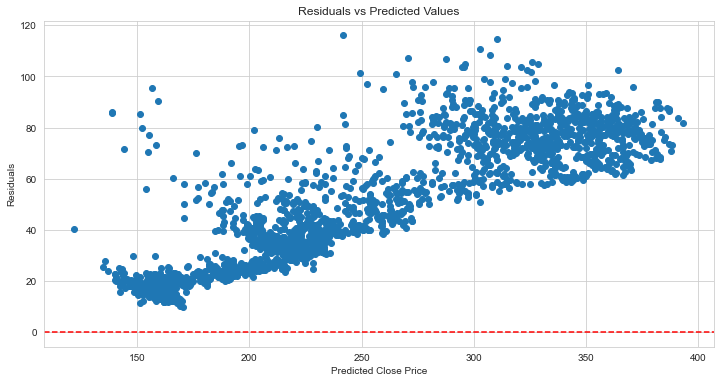

In [53]:
residuals = y_test - y_pred

plt.figure(figsize=(12,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.show()


In [54]:
#Understanding the feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


  Feature   Coefficient
2     Low  3.280372e+00
4   Close  9.889783e-01
0    Open  3.657730e-02
3  Volume  5.047443e-08
1    High -3.447243e+00
